# Data analysis of terrorist attacks in Syria and the rest of the world

## Importing data

Importing data using pandas library
encountered a problem with importing the whole data but importing a chunk of data containing 1000000000 rows worked


In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = '/home/laura/Downloads/globalterrorismdb_0718dist.csv'
row_count = 1000000000
for data in pd.read_csv(path, chunksize=row_count, error_bad_lines=False, encoding='ISO-8859-1',low_memory=False): 
    print(data.head(1)) 

        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   

          country_txt  region   ...    addnotes scite1 scite2  scite3  \
0  Dominican Republic       2   ...         NaN    NaN    NaN     NaN   

   dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0      PGIS        0         0        0       0      NaN  

[1 rows x 135 columns]


## Data analysis

The graph below shows how many terrorist attacks worldwide occured in a each year from 1970 to 2017

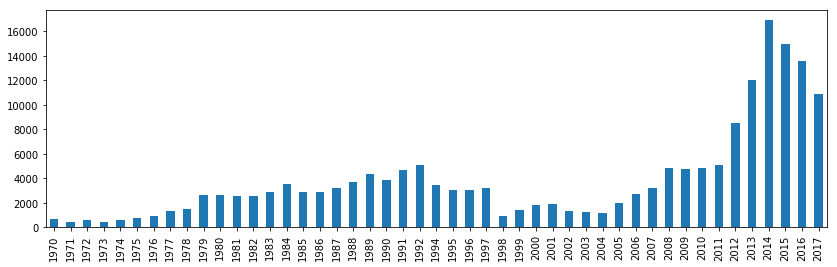

In [2]:
data['iyear'].value_counts().sort_index().plot(kind = 'bar', figsize=(14, 4))

The graph below shows how many terrorist attacks occured in each country between 1970 and 2017

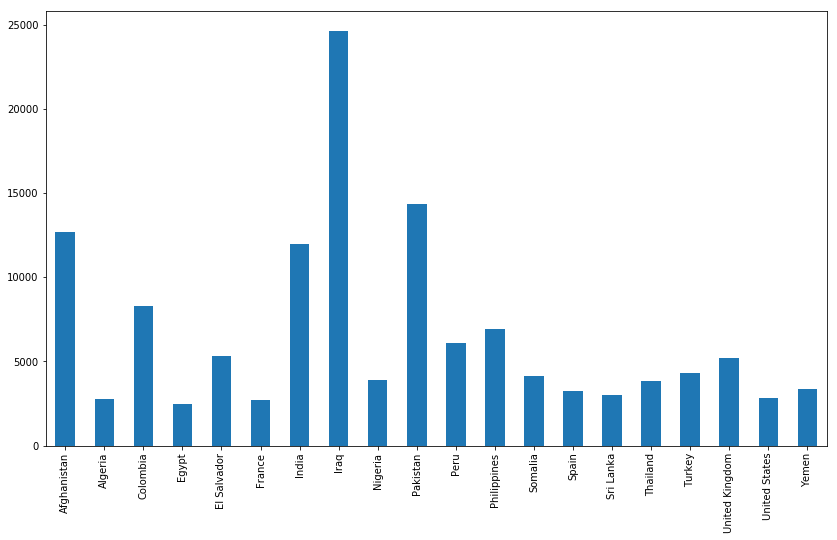

In [3]:
data['country_txt'].value_counts()[:20].sort_index().plot(kind = 'bar', figsize= (14, 8))

The graph below shows how many terrorist attacks occured in Syria between 1970 and 2017
It shows how the number of terrorist attacks have increased from 2011 after the war started

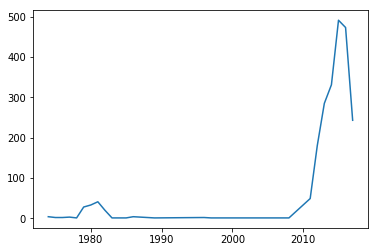

In [4]:
%matplotlib inline

query = data.where(data.country_txt.str.startswith('Syria'))
syria = query.dropna(how='all')
x = syria['iyear'].value_counts().sort_index()
plt.plot(x)
plt.show()

The graph below shows how many terrorist attacks occured in the capital of Syria - Damascus between 1970 and 2017. It also shows how the number of terrorist attacks have increased from 2011 after the war started

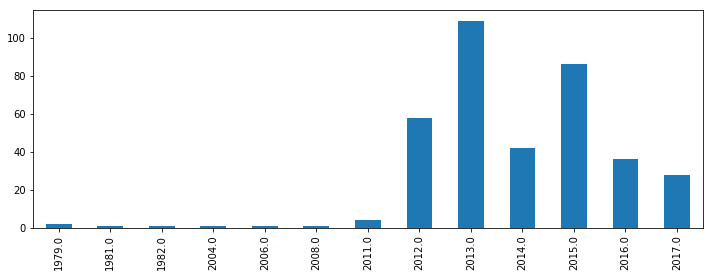

In [5]:
syria = data.where(data.country_txt.str.startswith('Syria'))
syria = syria.dropna(how='all')
syria_city = syria.where(syria.city.str.startswith('Damas'))
syria_city['iyear'].value_counts().sort_index().plot(kind = 'bar', figsize=(12, 4))

The graph below shows which terrorist groups performed most attacks in Syria between 1970 and 2017. The graph shows top 15 terrorist groups. 

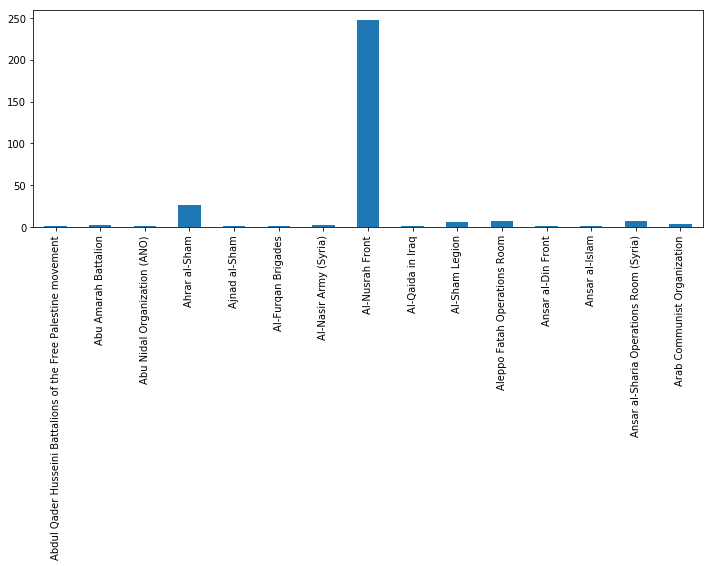

In [18]:
syria = data.where(data.country_txt.str.startswith('Syria'))
syria = syria.dropna(how='all')
syria['gname'].value_counts().sort_index()[:15].plot(kind = 'bar', figsize=(12, 4))

The graph below shows which group was most often the target of terrorist attacks in Syria between 1970 and 2017.

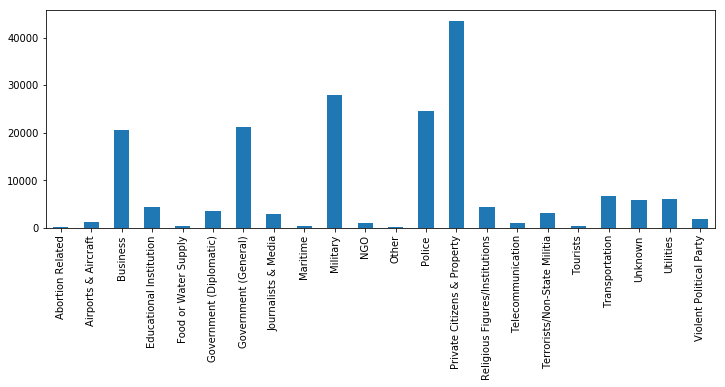

In [14]:
data['targtype1_txt'].value_counts().sort_index()[:30].plot(kind = 'bar', figsize=(12, 4))

The graph below shows how many people got killed in terrorist attacks occured in Syria between 1970 and 2017. The graph includes only the cases where the number of people killed in the attack was above 50.

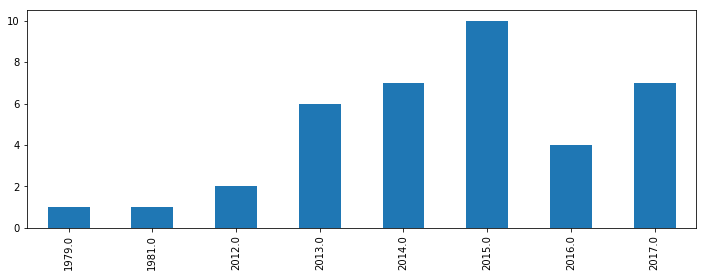

In [21]:
kill = data.where(data.country_txt.str.startswith('Syria'))
kill = kill.where(kill['nkill']>50)
kill = kill.dropna(how = 'all')
kill['iyear'].value_counts().sort_index().plot(kind = 'bar', figsize=(12, 4))
xlabel=('year')
plt.show()